In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
pd.set_option('display.max_columns',None)

In [2]:
df = pd.read_csv(r"C:\Users\KABI\OneDrive\Documents\UNIFIED MENTOR INTERN\Financial_Analytics_project\Financial Analytics data.csv")
df.head()

,S.No.,Name,Mar Cap - Crore,Sales Qtr - Crore,Unnamed: 4
0,1,Reliance Inds.,583436.72,99810.00,NaN
1,2,TCS,563709.84,30904.00,NaN
2,3,HDFC Bank,482953.59,20581.27,NaN
3,4,ITC,320985.27,9772.02,NaN
4,5,H D F C,289497.37,16840.51,NaN


In [3]:
df.shape

(488, 5)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 488 entries, 0 to 487
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   S.No.              488 non-null    int64  
 1   Name               488 non-null    object 
 2   Mar Cap - Crore    479 non-null    float64
 3   Sales Qtr - Crore  365 non-null    float64
 4   Unnamed: 4         94 non-null     float64
dtypes: float64(3), int64(1), object(1)
memory usage: 19.2+ KB


In [5]:
df.describe()

,S.No.,Mar Cap - Crore,Sales Qtr - Crore,Unnamed: 4
count,488.000000,479.000000,365.000000,94.000000
mean,251.508197,28043.857119,4395.976849,1523.870106
std,145.884078,59464.615831,11092.206185,1800.008836
min,1.000000,3017.070000,47.240000,0.000000
25%,122.750000,4843.575000,593.740000,407.167500
50%,252.500000,9885.050000,1278.300000,702.325000
75%,378.250000,23549.900000,2840.750000,2234.815000
max,500.000000,583436.720000,110666.930000,7757.060000


In [6]:
df.isnull().sum()

S.No.                  0
Name                   0
Mar Cap - Crore        9
Sales Qtr - Crore    123
Unnamed: 4           394
dtype: int64

In [7]:
#renaming the columns
df.columns = ['S.NO','Company Name','Market_cap','Qtr_sales','Unnamed']
df.head()

,S.NO,Company Name,Market_cap,Qtr_sales,Unnamed
0,1,Reliance Inds.,583436.72,99810.00,NaN
1,2,TCS,563709.84,30904.00,NaN
2,3,HDFC Bank,482953.59,20581.27,NaN
3,4,ITC,320985.27,9772.02,NaN
4,5,H D F C,289497.37,16840.51,NaN


In [8]:
max_no = df['S.NO'].max()
Total_no = set(range(1,max_no+1))
current_no = set(df['S.NO'])

missing = Total_no - current_no
missing

{124, 125, 174, 175, 187, 188, 251, 252, 253, 254, 265, 266}

In [9]:
df['Unnamed'].unique()

array([    nan, 2149.36, 3115.89, 6170.71, 6177.88, 3913.82, 2858.36,
       2263.3 , 1542.9 , 2429.5 , 3259.6 , 2469.03, 1693.72, 1337.59,
       7113.16, 2512.82, 2110.99, 3975.62, 7757.06, 3325.02, 3834.1 ,
        683.28, 4194.  , 1059.12, 1390.55, 1057.9 , 6626.35, 4336.11,
       6509.6 , 2779.4 , 1965.77, 1639.55, 3684.95, 3494.24,  317.85,
        704.16, 3798.82, 3087.67,  562.2 ,  479.7 ,  969.1 ,  387.7 ,
        865.36,  329.92,  784.05,  848.13,  667.5 ,  350.18,  865.77,
        656.78,  840.02,   19.42,  842.71,  521.32,  473.42,  706.43,
        456.54,  704.59,  182.21,  700.49,  162.17,  271.13,  465.68,
        624.37,  756.5 ,  141.61,   64.75,  581.94,  390.16,  506.06,
        143.13,   47.02,  595.05,  482.52,  290.88,   63.93,  433.19,
        472.48,  399.29,    0.  ,  183.74,  185.65,  297.43,  535.6 ,
        506.82,  729.22,  754.7 ,  612.4 ,   80.62,   74.82,  636.2 ,
         60.97,   82.87,  430.8 ,  626.8 ])

In [10]:
# getting the qtr sales column missed values from the unnamed column
for i in range(len(df)):
    if pd.isnull(df['Unnamed'][i]):
        pass
    else:
        df.loc[i,'Qtr_sales']=df['Unnamed'][i]

In [11]:
# removing the unwanted columns 
df.drop(['Unnamed','S.NO'],axis = 1, inplace = True)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 488 entries, 0 to 487
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Company Name  488 non-null    object 
 1   Market_cap    479 non-null    float64
 2   Qtr_sales     459 non-null    float64
dtypes: float64(2), object(1)
memory usage: 11.6+ KB


In [13]:
market_cap_skew = df['Market_cap'].skew()
qtr_sales_skew = df['Qtr_sales'].skew()

print('Market Cap Skewness:', market_cap_skew)
print('qtr_sales_skew:', qtr_sales_skew)

Market Cap Skewness: 5.560197674089212
qtr_sales_skew: 6.833822665838169


### Treating the null values with median values

In [14]:
df['Market_cap'].fillna(df['Market_cap'].median(), inplace=True)
df['Qtr_sales'].fillna(df['Qtr_sales'].median(), inplace=True)


In [15]:
#checking for the null values

df.isnull().sum()

Company Name    0
Market_cap      0
Qtr_sales       0
dtype: int64

In [16]:
df.duplicated().sum()

0

In [17]:
for i in range(len(df)):
    if df['Company Name'][i].isupper():
        df.loc[i,'Company Name']= df['Company Name'][i].replace(' ','')

In [18]:
df.head()

,Company Name,Market_cap,Qtr_sales
0,Reliance Inds.,583436.72,99810.00
1,TCS,563709.84,30904.00
2,HDFC Bank,482953.59,20581.27
3,ITC,320985.27,9772.02
4,HDFC,289497.37,16840.51


## Data Analysis

In [19]:
df.describe().astype(int)

,Market_cap,Qtr_sales
count,488,488
mean,27708,3649
std,58963,9708
min,3017,0
25%,4879,570
50%,9885,1137
75%,23400,2580
max,583436,110666


In [20]:
df_sorted = df.sort_values(by = 'Market_cap', ascending = False)
largest_market_cap = df_sorted
print('largest Market Cap company:')
print()
print(df_sorted[['Company Name','Market_cap']].head(1))

largest Market Cap company:

     Company Name  Market_cap
0  Reliance Inds.   583436.72


In [21]:
df_sorted = df.sort_values(by = 'Market_cap', ascending = True)
smallest_market_cap = df_sorted
print("Smallest Market Cap company:")
print()
print(df_sorted[['Company Name','Market_cap']].head(1))

Smallest Market Cap company:

        Company Name  Market_cap
486  Natl.Fertilizer     3017.07


In [22]:
df_sorted = df.sort_values(by = 'Qtr_sales', ascending = False)
largest_qtr_sales = df_sorted
print("largest Qtr sales company:")
print()
print(df_sorted[['Company Name','Qtr_sales']].head(1))

largest Qtr sales company:

   Company Name  Qtr_sales
14         IOCL  110666.93


In [23]:
df_sorted = df.sort_values(by = 'Qtr_sales', ascending = True)
smallest_qtr_sales = df_sorted
print("Smallest Qtr sales company:")
print()
print(df_sorted[['Company Name','Qtr_sales']].head(1))

Smallest Qtr sales company:

         Company Name  Qtr_sales
393  Ujjivan Fin.Ser.        0.0


#### Price to sales ratio (P/S = Market_cap / Quarterly_sales)

#### A high P/S ratio might indicate a company is overvalued or has high growth expectations

In [24]:
df['Price_sales_ratio']= (df['Market_cap']/df['Qtr_sales']).round(2)
df.head()

,Company Name,Market_cap,Qtr_sales,Price_sales_ratio
0,Reliance Inds.,583436.72,99810.00,5.85
1,TCS,563709.84,30904.00,18.24
2,HDFC Bank,482953.59,20581.27,23.47
3,ITC,320985.27,9772.02,32.85
4,HDFC,289497.37,16840.51,17.19


In [25]:
df.to_csv("C:/Users/KABI/OneDrive/Documents/UNIFIED MENTOR INTERN/Financial_Analytics_project/Financial_Analytics.csv",index= False)

## Top 10 Largest P/S RATIO COMPANY

In [26]:
df_sorted = df.sort_values(by = 'Price_sales_ratio', ascending = False)
largest_PS_company = df_sorted
print("Top 10 Largest P/S ratio company")
print()
print(df_sorted[['Company Name','Price_sales_ratio']].head(10))

Top 10 Largest P/S ratio company

         Company Name  Price_sales_ratio
393  Ujjivan Fin.Ser.                inf
228             SPARC             553.82
95     Bajaj Holdings              95.35
382   Tata Inv.Corpn.              93.61
373  Indian Energy Ex              70.98
467  Central Dep. Ser              70.20
388       Forbes & Co              67.76
422  Multi Comm. Exc.              63.10
245        Delta Corp              58.78
239  ERIS Lifescience              56.47


## Top 10 Largest P/S RATIO COMPANY

In [27]:
df_sorted = df.sort_values(by = 'Price_sales_ratio', ascending = True)
smallest_PS_company = df_sorted
print("Top 10 Smallest P/S ratio company")
print()
print(df_sorted[['Company Name','Price_sales_ratio']].head(10))

Top 10 Smallest P/S ratio company

         Company Name  Price_sales_ratio
320   Redington India               0.50
122    Rajesh Exports               0.57
334              CPCL               0.63
441  Corporation Bank               0.85
444     Oriental Bank               0.86
410       Andhra Bank               0.89
405    Allahabad Bank               0.97
54               HPCL               1.01
486   Natl.Fertilizer               1.06
316    Syndicate Bank               1.13


## Data Visualisation

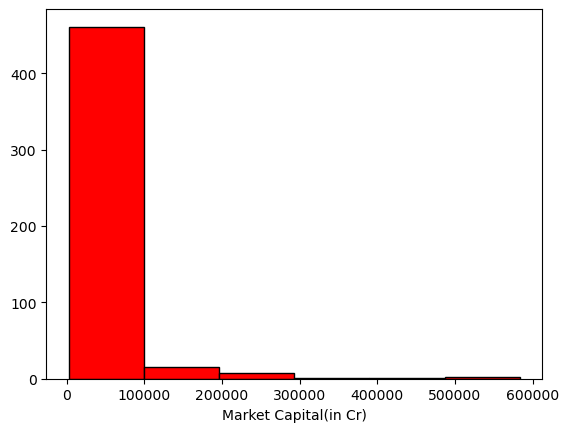

In [28]:
plt.hist(df['Market_cap'],bins=6,color='red',edgecolor = 'black')
plt.xlabel('Market Capital(in Cr)')
plt.show()

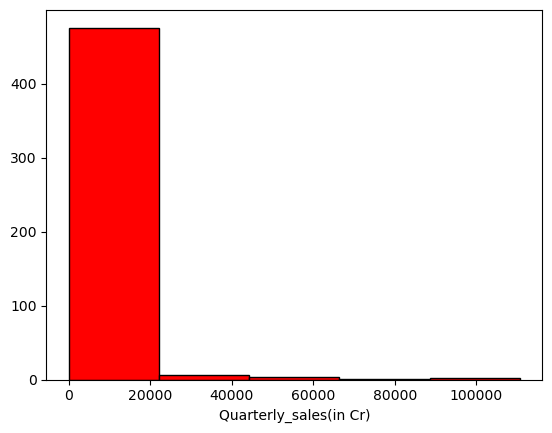

In [29]:
plt.hist(df['Qtr_sales'],bins=5,color='red',edgecolor = 'black')
plt.xlabel('Quarterly_sales(in Cr)')
plt.show()

## Largest 10 Companies (by Market Cap)

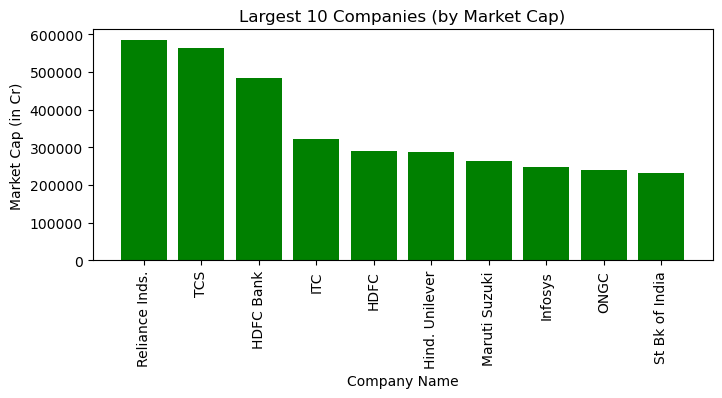

In [30]:
plt.figure(figsize=(8,3))
x = largest_market_cap['Company Name'].head(10)
y = largest_market_cap['Market_cap'].head(10)
plt.bar(x,y,color='green')
plt.xticks(x, rotation = 'vertical')
plt.xlabel('Company Name')
plt.ylabel('Market Cap (in Cr)')
plt.title('Largest 10 Companies (by Market Cap)')
plt.show()

## Smallest 10 Companies (by Market Cap)

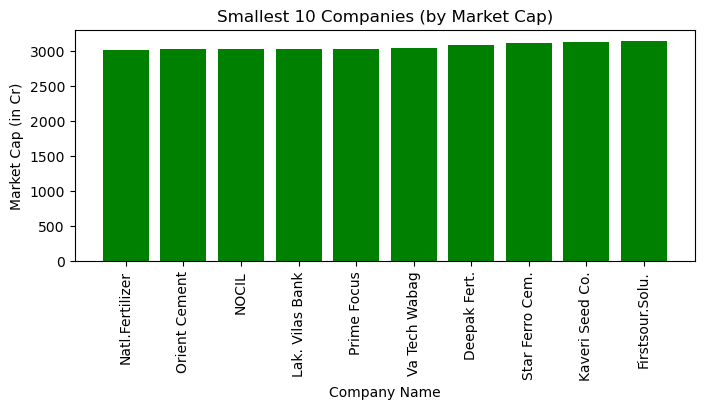

In [31]:
plt.figure(figsize=(8,3))
x = smallest_market_cap['Company Name'].head(10)
y = smallest_market_cap['Market_cap'].head(10)
plt.bar(x,y,color='green')
plt.xticks(x, rotation = 'vertical')
plt.xlabel('Company Name')
plt.ylabel('Market Cap (in Cr)')
plt.title('Smallest 10 Companies (by Market Cap)')
plt.show()

## Largest 10 Companies (by Quarterly Sales)

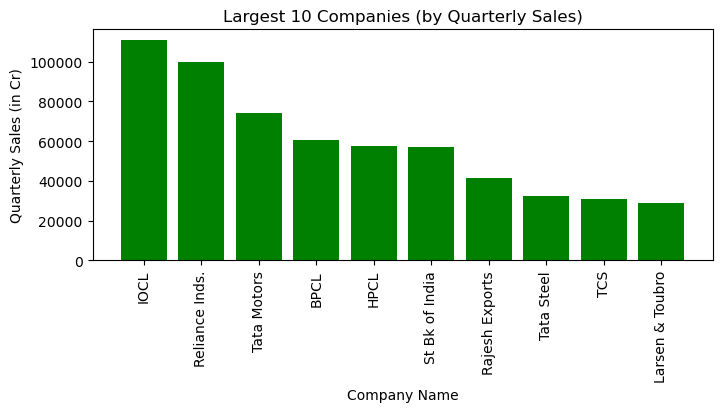

In [32]:
plt.figure(figsize=(8,3))
x = largest_qtr_sales['Company Name'].head(10)
y = largest_qtr_sales['Qtr_sales'].head(10)
plt.bar(x,y,color='green')
plt.xticks(x, rotation = 'vertical')
plt.xlabel('Company Name')
plt.ylabel('Quarterly Sales (in Cr)')
plt.title('Largest 10 Companies (by Quarterly Sales)')
plt.show()

## Smallest 10 Companies (by Quarterly Sales)

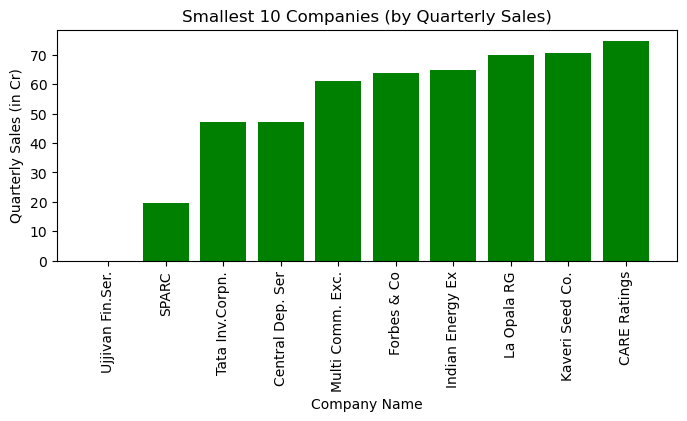

In [33]:
plt.figure(figsize=(8,3))
x = smallest_qtr_sales['Company Name'].head(10)
y = smallest_qtr_sales['Qtr_sales'].head(10)
plt.bar(x,y,color='green')
plt.xticks(x, rotation = 'vertical')
plt.xlabel('Company Name')
plt.ylabel('Quarterly Sales (in Cr)')
plt.title('Smallest 10 Companies (by Quarterly Sales)')
plt.show()

## Largest 10 Companies (by P/S Ratio)

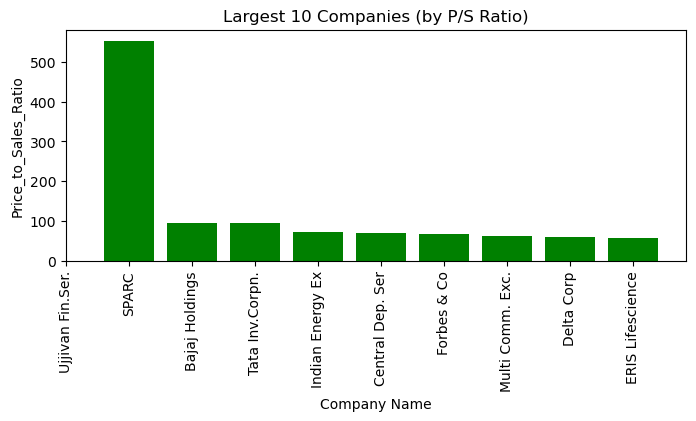

In [34]:
plt.figure(figsize=(8,3))
x = largest_PS_company['Company Name'].head(10)
y = largest_PS_company['Price_sales_ratio'].head(10)
plt.bar(x,y,color='green')
plt.xticks(x, rotation = 'vertical')
plt.xlabel('Company Name')
plt.ylabel('Price_to_Sales_Ratio')
plt.title('Largest 10 Companies (by P/S Ratio)')
plt.show()

## Smallest 10 Companies (by P/S Ratio)

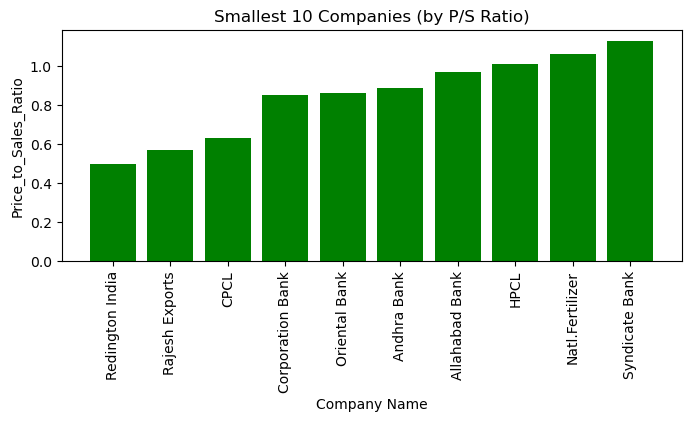

In [35]:
plt.figure(figsize=(8,3))
x = smallest_PS_company['Company Name'].head(10)
y = smallest_PS_company['Price_sales_ratio'].head(10)
plt.bar(x,y,color='green')
plt.xticks(x, rotation = 'vertical')
plt.xlabel('Company Name')
plt.ylabel('Price_to_Sales_Ratio')
plt.title('Smallest 10 Companies (by P/S Ratio)')
plt.show()